# Practice 7 - kNN, Decision Tree, SVM

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Preparation of the data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

**Loading the data set from Scikit-Learn**

In [2]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [3]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

**Getting a description of the data set**

In [4]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [5]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [7]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.head()

,tumor type
0,0
1,0
2,0
3,0
4,0


**To make the target encoding more obvious (we want to predict the risk of cancer), we invert the encoding values so that now 0 codes benign and 1 codes malignant**

In [8]:
tumor_type = target.replace({0:1, 1:0})
tumor_type.head()


,tumor type
0,1
1,1
2,1
3,1
4,1


## Subject

We consider two predictors: mean radius and mean texture.
* Train a k-NN with k=5 and plot the decision areas based on that model.
* Explore different values of k to determine an optimal value.
* Train a k-NN with the optimal k you found.
* Train a Decision Tree and plot the decision areas based on that model.
* What would be an optimal value for the depth of the Decision Tree?  
*Hint*: you can use parameter max_depth of DecisionTreeClassifier.
* Train a Random Forest and plot the decision areas based on that model.  
*Bonus:* you can tune the hyperparameters of your Random Forest model (refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to see what parameters can be tuned). If you want to facilitate the optimization of many hyperparameters at once, you can use the [Grid Search method](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). 
* Train a SVM (with linear kernel) and plot the decision areas based on that model.
* Compare the performance between all models. Choose a comparison metric and explain your choice.
* Pick the best model, explain your choice, and compute its performance on unseen test data (unseen means your model was never trained or tuned on it).

# 1 Train a k-NN with k=5 and plot the decision areas based on that model.

In [9]:
#First Step Let's merge subdata into one data
cancer_data = pd.merge(features,tumor_type,left_index=True,right_index=True)
cancer_data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


Text(0.5, 0, 'mean texture')

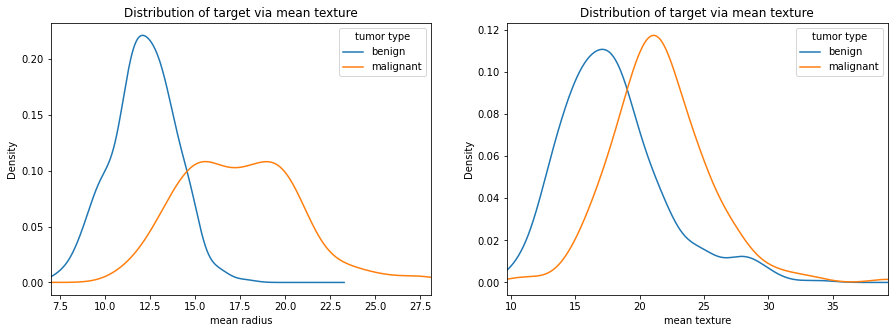

In [10]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
# split into small set data (variety)
cancer_data.groupby('tumor type')['mean radius'].plot(kind='density')
plt.xlim(cancer_data['mean radius'].min(),cancer_data['mean radius'].max())
plt.title("Distribution of target via mean texture")
plt.legend(title = 'tumor type', labels =['benign','malignant']) # add label names
plt.xlabel('mean radius')

plt.subplot(1, 2, 2)
cancer_data.groupby('tumor type')['mean texture'].plot(kind='density')
plt.xlim(cancer_data['mean texture'].min(),cancer_data['mean texture'].max())
plt.title("Distribution of target via mean texture")
plt.legend(title = 'tumor type', labels =['benign','malignant']) # add label names
plt.xlabel('mean texture')

###  Preparing the data set

In [11]:
X = cancer_data[['mean radius', 'mean texture']].values
y=cancer_data['tumor type']

In [12]:
X

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: tumor type, Length: 569, dtype: int64

#### Train-test split:

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 2) (426,)
Test set: (143, 2) (143,)


#### Feature scaling:

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training a k-NN model

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = {'classifier': KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean')}
knn['classifier'].fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [17]:
print(knn['classifier'].predict(sc.transform([[20.57,17.77]])))

[1]


In [18]:
from matplotlib.colors import ListedColormap
def plot_decision_areas(X,y,model):
    fig = plt.figure(figsize=(10,6), dpi= 70)
    X_set, y_set = sc.inverse_transform(X), y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max()),
                         np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max()))
    plt.contourf(X1, X2,model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75,cmap = ListedColormap(( 'lightgreen','salmon')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('green','red'))(i), label = j)
    plt.title('The decision areas(Training set)')
    plt.xlabel('mean radius')
    plt.ylabel('mean texture')
    plt.legend(title='tumor type (train set)')
    plt.show()

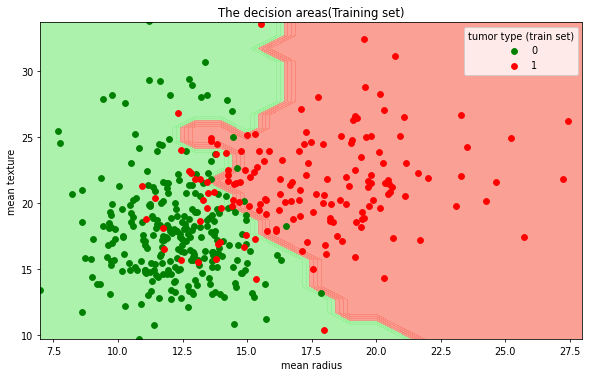

In [19]:
plot_decision_areas(X_train,y_train,knn['classifier'])

# 2 Explore different values of k to determine an optimal value.

Let's compute the model performance with current K=5

In [20]:
knn['y_pred']=knn['classifier'].predict(X_test)
knn['y_pred']

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def compute_metrics(y_test,classifier_data):
    model_name = classifier_data['classifier'].__class__.__name__
    
    accuracy = round(accuracy_score(y_test, classifier_data['y_pred']), 2)
    precision = round(precision_score(y_test, classifier_data['y_pred']),2)
    recall = round(recall_score(y_test, classifier_data['y_pred']),2)
    f1 = round(f1_score(y_test, classifier_data['y_pred']), 2)
    auc = round(roc_auc_score(y_test, classifier_data['y_proba_positive']), 2)
    
    print('Model: ' + model_name)
    print('-' * 80)
    print('Accuracy (proportion of correct predictions) is ' + str(accuracy))
    print('Precision (proportion of true purchases among purchase predictions) is ' + str(precision))
    print('Recall (proportion of true purchases that are correctly predicted) is ' + str(recall))
    print('F1 score (combination of precision and recall) is ' + str(f1))
    print('Area Under the Curve (AUC) is ' + str(auc))
    return pd.DataFrame({
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 score': f1,
        'AUC score': auc
    }, index=[model_name])

Let's try to find the K optimal 

[0.81, 0.85, 0.85, 0.85, 0.87, 0.86, 0.87, 0.88, 0.87, 0.87, 0.89, 0.87, 0.87, 0.87, 0.88, 0.89, 0.87, 0.89, 0.88, 0.89, 0.88, 0.9, 0.9, 0.9, 0.91, 0.91, 0.91, 0.92, 0.92]
Maximun Accuracy is : 0.92 at K = 28


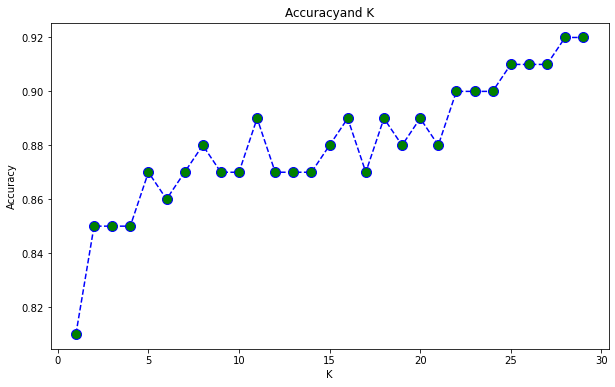

In [53]:
#find K with minimum error (Maximun Accuracy)
Accuracy= []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    Accuracy.append(round(accuracy_score(y_test, y_pred),2))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),Accuracy,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)
plt.title('Accuracyand K')
plt.xlabel('K')
plt.ylabel('Accuracy')
print(Accuracy)
print("Maximun Accuracy is :",max(Accuracy),"at K =", Accuracy.index(max(Accuracy))+1)

# 3 Train a k-NN with the optimal k you found.

In [23]:

knn = {'classifier': KNeighborsClassifier(n_neighbors =28, metric = 'euclidean')}
knn['classifier'].fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=28)

# 4 Train a Decision Tree and plot the decision areas based on that model.

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 4)}
dt['classifier'].fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [25]:
print(dt['classifier'].predict(sc.transform([[17.99, 10.38]])))

[1]


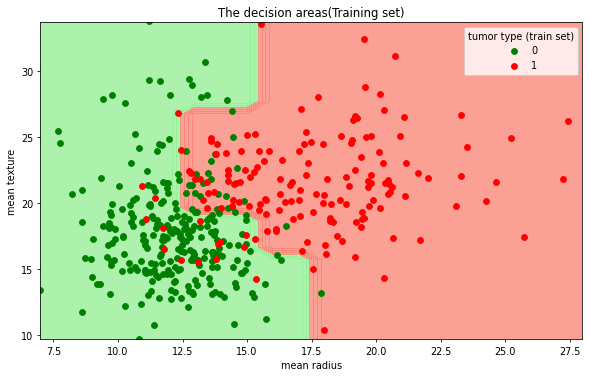

In [26]:
plot_decision_areas(X_train,y_train,dt['classifier'])

## 5 What would be an optimal value for the depth of the Decision Tree?

Using parameter max_depth of DecisionTreeClassifier to optimal value.

[0.89, 0.87, 0.87, 0.87, 0.89, 0.88, 0.9, 0.89, 0.86, 0.87, 0.85, 0.87, 0.86, 0.86, 0.85, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86]
Maximun Accuracy is : 0.9 at max_depth = 7


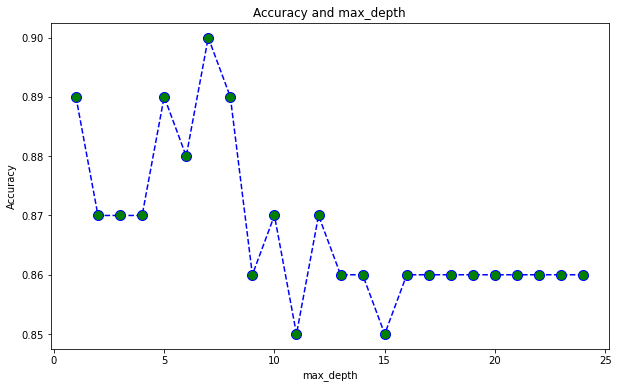

In [27]:
from sklearn.tree import DecisionTreeClassifier

Accuracy= []
for i in range(1,25):
    dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = i).fit(X_train,y_train)
    dt.fit(X_train,y_train)
    y_pred = dt.predict(X_test)
    Accuracy.append(round(accuracy_score(y_test, y_pred),2))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),Accuracy,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)
plt.title('Accuracy and max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
print(Accuracy)
print("Maximun Accuracy is :",max(Accuracy),"at max_depth =", Accuracy.index(max(Accuracy))+1)

In [28]:
dt = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 7)}
dt['classifier'].fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

# 6 Train a Random Forest and plot the decision areas based on that model.

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = {'classifier': RandomForestClassifier(criterion = 'entropy', n_estimators =10)}
rf['classifier'].fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [30]:
print(rf['classifier'].predict(sc.transform([[17.99, 10.38]])))

[1]


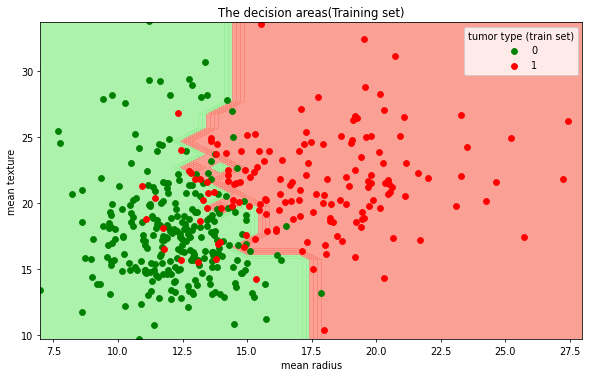

In [31]:
plot_decision_areas(X_train,y_train,rf['classifier'])

# 7 Bonus:* you can tune the hyperparameters of your Random Forest model (refer to the documentation to see what parameters can be tuned). If you want to facilitate the optimization of many hyperparameters at once, you can use the Grid Search method.

# 8 Train a SVM (with linear kernel) and plot the decision areas based on that model.

In [32]:
from sklearn.svm import SVC
svm = {'classifier': SVC(kernel = 'linear', random_state = 0, probability = True)}
# svm = {'classifier': SVC(kernel = 'rbf', random_state = 0, probability = True)}
svm['classifier'].fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

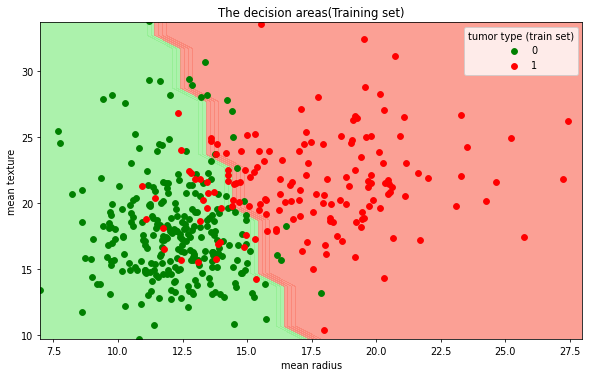

In [33]:
plot_decision_areas(X_train,y_train,svm['classifier'])

# 9 Compare the performance between all models. Choose a comparison metric and explain your choice.

Storing the the probabilities for the positive class in a separate variable

In [34]:
knn['y_proba'] = knn['classifier'].predict_proba(X_test)
knn['y_proba'][:10]

array([[0.64285714, 0.35714286],
       [0.5       , 0.5       ],
       [0.89285714, 0.10714286],
       [0.82142857, 0.17857143],
       [0.96428571, 0.03571429],
       [0.92857143, 0.07142857],
       [0.78571429, 0.21428571],
       [0.92857143, 0.07142857],
       [0.89285714, 0.10714286],
       [1.        , 0.        ]])

In [35]:
dt['y_proba'] = dt['classifier'].predict_proba(X_test)
dt['y_proba'][:10]

array([[0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.77272727, 0.22727273],
       [0.77272727, 0.22727273],
       [0.94936709, 0.05063291],
       [0.94936709, 0.05063291],
       [1.        , 0.        ],
       [0.94936709, 0.05063291],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [36]:
rf['y_proba'] = rf['classifier'].predict_proba(X_test)
rf['y_proba'][:10]

array([[0.5, 0.5],
       [0.4, 0.6],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ]])

In [37]:
svm['y_proba'] = svm['classifier'].predict_proba(X_test)
svm['y_proba'][:10]

array([[0.74253998, 0.25746002],
       [0.56199099, 0.43800901],
       [0.81795624, 0.18204376],
       [0.68163315, 0.31836685],
       [0.86225378, 0.13774622],
       [0.9647726 , 0.0352274 ],
       [0.86252468, 0.13747532],
       [0.94607599, 0.05392401],
       [0.99455051, 0.00544949],
       [0.99413477, 0.00586523]])

In [38]:
model_list=[knn,dt,rf,svm]

In [39]:
for model in model_list:
    model['y_proba_positive'] = model['y_proba'][:,1]

Prediction of the class and comparison with the true one:

In [40]:
knn['y_pred']=knn['classifier'].predict(X_test)

In [41]:
dt['y_pred'] = dt['classifier'].predict(X_test)

In [42]:
rf['y_pred'] = rf['classifier'].predict(X_test)

In [43]:
svm['y_pred'] = svm['classifier'].predict(X_test)

 KNN performance

In [44]:
knn['metrics']=compute_metrics(y_test,knn)

Model: KNeighborsClassifier
--------------------------------------------------------------------------------
Accuracy (proportion of correct predictions) is 0.92
Precision (proportion of true purchases among purchase predictions) is 0.89
Recall (proportion of true purchases that are correctly predicted) is 0.89
F1 score (combination of precision and recall) is 0.89
Area Under the Curve (AUC) is 0.96


Decision Tree performance

In [45]:
dt['metrics']=compute_metrics(y_test,dt)

Model: DecisionTreeClassifier
--------------------------------------------------------------------------------
Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true purchases among purchase predictions) is 0.87
Recall (proportion of true purchases that are correctly predicted) is 0.85
F1 score (combination of precision and recall) is 0.86
Area Under the Curve (AUC) is 0.91


Random forest performance

In [46]:
rf['metrics']=compute_metrics(y_test,rf)

Model: RandomForestClassifier
--------------------------------------------------------------------------------
Accuracy (proportion of correct predictions) is 0.87
Precision (proportion of true purchases among purchase predictions) is 0.83
Recall (proportion of true purchases that are correctly predicted) is 0.81
F1 score (combination of precision and recall) is 0.82
Area Under the Curve (AUC) is 0.95


SVM performance

In [47]:

svm['metrics']=compute_metrics(y_test,svm)

Model: SVC
--------------------------------------------------------------------------------
Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true purchases among purchase predictions) is 0.87
Recall (proportion of true purchases that are correctly predicted) is 0.87
F1 score (combination of precision and recall) is 0.87
Area Under the Curve (AUC) is 0.96


Comparing to the metrics

In [48]:
model_list = [knn,dt,rf,svm]

In [49]:
pd.concat([model['metrics'] for model in model_list])

,Accuracy,Precision,Recall,F1 score,AUC score
KNeighborsClassifier,0.92,0.89,0.89,0.89,0.96
DecisionTreeClassifier,0.90,0.87,0.85,0.86,0.91
RandomForestClassifier,0.87,0.83,0.81,0.82,0.95
SVC,0.90,0.87,0.87,0.87,0.96


I choose Recall metric to compare.
For medical diagnosis, it is often prefered to have the lowest number of false negatives (i.e. non detections) because it could be dramatic for people suffering from cancer not to be detected on time. In that context, we will choose the model has the high recall.

ROC curve

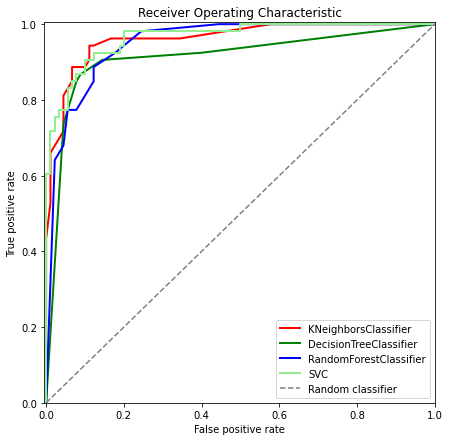

In [50]:
from sklearn.metrics import roc_curve

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic')
colors = ['red', 'green', 'blue', 'lightgreen']

# Plot ROC curve of each model
for i, model in enumerate(model_list):
    model_name = model['classifier'].__class__.__name__
    model['y_proba_positive'] = model['y_proba'][:,1]
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, model['y_proba_positive'])
    plt.plot(false_positive_rate, true_positive_rate, c=colors[i], linewidth=2, label=model_name)
    
# Plot ROC curve for a random classifier
plt.plot([0, 1], ls='--', c='grey', label='Random classifier')

# Formatting
plt.xlim([-0.005, 1])
plt.ylim([0, 1.005])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# 10 Pick the best model, explain your choice, and compute its performance on unseen test data (unseen means your model was never trained or tuned on it).

Baded on the comparison metric for all model. I decided to pick KNeighbors model. Because ii's recall is highest. It's suitable for the purpose of increasing the efficiency of accurate malignant prediction.

In [51]:
classifier_list = [knn,dt,rf,svm]

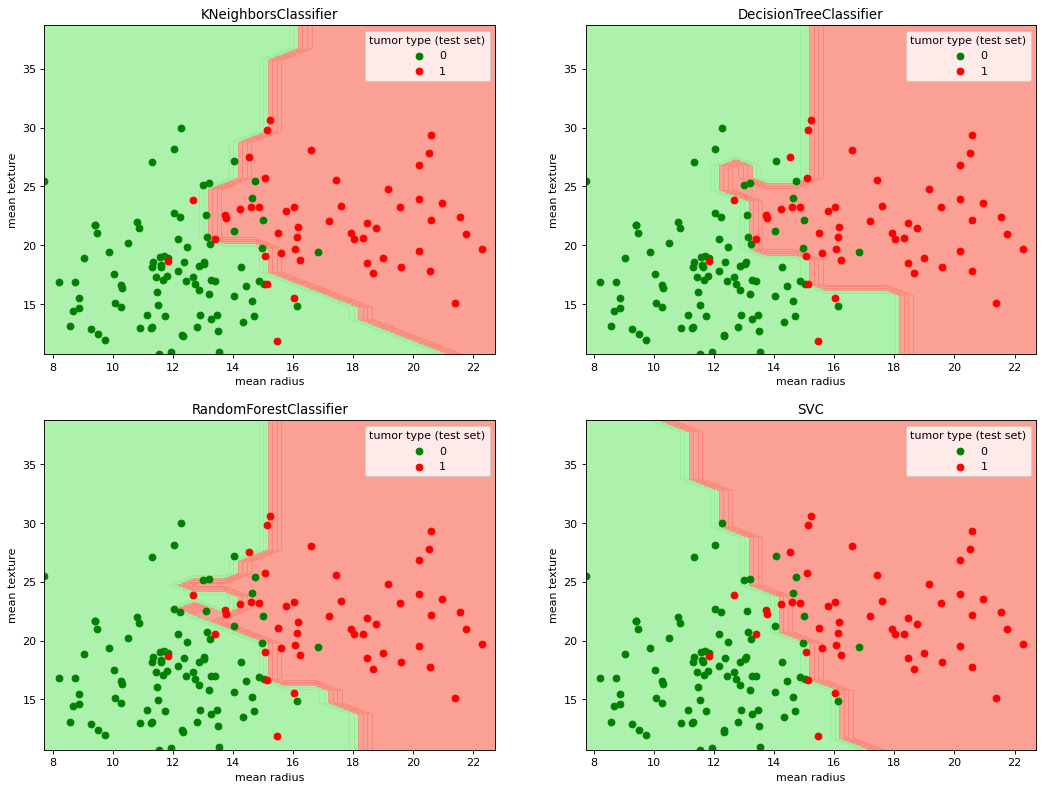

In [52]:
from matplotlib.colors import ListedColormap

# Prepare feature grid
fig, axs = plt.subplots(2, 2, figsize=(16,12), dpi= 80)
X_set, y_set = sc.inverse_transform(X_test),(y_test)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max()),
    np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max()))
positions = [(0,0), (0,1), (1,0), (1,1)]

# Loop on classifier 
for i, classifier in enumerate(classifier_list):
    i_axs = positions[i]
    axs[i_axs].contourf(X1, X2, classifier['classifier'].predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('lightgreen','salmon')))
    
    for i, j in enumerate(np.unique(y_set)):
        axs[i_axs].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('green','red'))(i), label = j)
    
    axs[i_axs].set_xlim(X1.min(), X1.max())
    axs[i_axs].set_ylim(X2.min(), X2.max())
    axs[i_axs].legend(title='tumor type (test set)')
    axs[i_axs].set_title(str(classifier['classifier'].__class__.__name__))
    axs[i_axs].set_xlabel('mean radius')
    axs[i_axs].set_ylabel('mean texture')
    


plt.show() 